In [1]:
import pandas as pd
ruta = '/content/sample_data/df_sin_customerID.csv'
df = pd.read_csv(ruta)
print(df.head())


  Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0    No          Female                       0              Yes   
1    No            Male                       0               No   
2   Yes            Male                       0               No   
3   Yes            Male                       1              Yes   
4   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService internet.OnlineSecurity  ...  \
0                      DSL                   

In [ ]:
unique_counts = df.nunique()
print(unique_counts)

In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    print(f"Opciones en la columna '{col}':")
    print(df[col].unique())
    print("-" * 40)

In [ ]:
df['customer.gender'] = df['customer.gender'].replace({
    'Female': 0,
    'Male': 1
})


In [ ]:
print(df['customer.gender'].value_counts())
print(df['customer.gender'].dtype)


In [ ]:
cols_binarias = [
    'Churn',
    'customer.Partner',
    'customer.Dependents',
    'phone.PhoneService',
    'account.PaperlessBilling'
]

for col in cols_binarias:
    if col in df.columns:
        df[col] = df[col].replace({'Yes': 1, 'No': 0})

# Verifica que quedó bien:
for col in cols_binarias:
    if col in df.columns:
        print(f"Valores únicos en {col}: {df[col].unique()}")


In [ ]:
# Mapeos para columnas con 'Yes', 'No', y una tercera categoría especial
cols_3vals_map_012 = [
    'phone.MultipleLines',
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies'
]

for col in cols_3vals_map_012:
    if col in df.columns:
        if col == 'phone.MultipleLines':
            df[col] = df[col].replace({'No': 0, 'Yes': 1, 'No phone service': 2})
        else:
            df[col] = df[col].replace({'No': 0, 'Yes': 1, 'No internet service': 2})

# Para 'internet.InternetService' también One-Hot Encoding
if 'internet.InternetService' in df.columns:
    dummies = pd.get_dummies(df['internet.InternetService'], prefix='internet.InternetService')
    df = pd.concat([df.drop('internet.InternetService', axis=1), dummies], axis=1)

# Para 'account.Contract' One-Hot Encoding
if 'account.Contract' in df.columns:
    dummies = pd.get_dummies(df['account.Contract'], prefix='account.Contract')
    df = pd.concat([df.drop('account.Contract', axis=1), dummies], axis=1)

# Verificación rápida:
print(df.head())
print(df.dtypes[df.dtypes == 'object'])  # no deberían quedar columnas object relacionadas a estas


In [ ]:
df[col] = df[col].replace({'No': 0, 'Yes': 1, 'No phone service': 2}).astype(int)


In [ ]:
df[col] = df[col].replace({'No': 0, 'Yes': 1, 'No internet service': 2}).astype(int)


In [ ]:
# Mostrar las primeras filas del DataFrame completo con todas las columnas
print(df.head())

# Opcional: para ver la lista completa de columnas transformadas
print("Columnas del DataFrame:")
print(df.columns.tolist())

# Si quieres un resumen más ordenado de tipos y valores únicos:
for col in df.columns:
    print(f"{col}: dtype={df[col].dtype}, valores únicos={df[col].nunique()}")


In [ ]:
if 'account.PaymentMethod' in df.columns:
    dummies = pd.get_dummies(df['account.PaymentMethod'], prefix='account.PaymentMethod')
    df = pd.concat([df.drop('account.PaymentMethod', axis=1), dummies], axis=1)


In [ ]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)


In [ ]:
# Aplicar one-hot encoding a 'account.PaymentMethod'
if 'account.PaymentMethod' in df.columns:
    dummies = pd.get_dummies(df['account.PaymentMethod'], prefix='account.PaymentMethod')
    df = pd.concat([df.drop('account.PaymentMethod', axis=1), dummies], axis=1)

# Convertir booleanos a enteros
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

# Mostrar primeras filas y tipos de dato
print(df.head())
print("\nTipos de datos en el DataFrame:")
print(df.dtypes)


In [ ]:
import pandas as pd

# --- Suponiendo que ya tienes cargado tu DataFrame df ---

# 1. Convertir columnas binarias Yes/No a 0/1
cols_binarias = [
    'Churn',
    'customer.gender',
    'customer.Partner',
    'customer.Dependents',
    'phone.PhoneService',
    'account.PaperlessBilling'
]

for col in cols_binarias:
    if col in df.columns:
        df[col] = df[col].replace({'Yes': 1, 'No': 0, 'Female': 0, 'Male': 1})

# 2. Convertir columnas con 3 valores a 0/1/2
cols_3vals_map_012 = [
    'phone.MultipleLines',
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies'
]

for col in cols_3vals_map_012:
    if col in df.columns:
        if col == 'phone.MultipleLines':
            df[col] = df[col].replace({'No': 0, 'Yes': 1, 'No phone service': 2}).astype(int)
        else:
            df[col] = df[col].replace({'No': 0, 'Yes': 1, 'No internet service': 2}).astype(int)

# 3. One-hot encoding para 'internet.InternetService'
if 'internet.InternetService' in df.columns:
    dummies = pd.get_dummies(df['internet.InternetService'], prefix='internet.InternetService')
    df = pd.concat([df.drop('internet.InternetService', axis=1), dummies], axis=1)

# 4. One-hot encoding para 'account.Contract'
if 'account.Contract' in df.columns:
    dummies = pd.get_dummies(df['account.Contract'], prefix='account.Contract')
    df = pd.concat([df.drop('account.Contract', axis=1), dummies], axis=1)

# 5. One-hot encoding para 'account.PaymentMethod'
if 'account.PaymentMethod' in df.columns:
    dummies = pd.get_dummies(df['account.PaymentMethod'], prefix='account.PaymentMethod')
    df = pd.concat([df.drop('account.PaymentMethod', axis=1), dummies], axis=1)

# 6. Convertir booleanos a enteros para evitar True/False
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

# 7. Mostrar primeras filas y tipos para verificar
print(df.head())
print("\nTipos de datos en el DataFrame:")
print(df.dtypes)

# 8. Guardar DataFrame limpio en CSV
df.to_csv("df_transformado.csv", index=False, encoding="utf-8-sig")
print("\nArchivo df_transformado.csv guardado correctamente.")


In [ ]:
# Ver proporción de valores únicos en la columna 'Churn'
print("Distribución de la variable Churn:")
print(df['Churn'].value_counts())

print("\nProporción relativa (porcentaje) de cada clase:")
print(df['Churn'].value_counts(normalize=True) * 100)


Esto nos muestra:
Cuántos clientes cancelaron (Churn = 1) y cuántos no (Churn = 0).
El porcentaje de cada clase en el dataset para entender si hay desbalance.

In [ ]:
# Ver cuántos valores NaN hay en cada columna
print(df.isna().sum())

In [ ]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import pandas as pd

# Imputar valores faltantes con la media en columnas numéricas
imputer = SimpleImputer(strategy='mean')

# Separar características y etiqueta
X = df.drop('Churn', axis=1)
y = df['Churn']

# Imputar solo en columnas numéricas, pero para evitar problemas con dummies (bool), vamos a imputar todo
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Ahora aplicar SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_imputed, y)

print("Distribución original de Churn:")
print(y.value_counts())

print("\nDistribución después de aplicar SMOTE:")
print(y_res.value_counts())

# Crear nuevo dataframe balanceado
df_resampled = X_res.copy()
df_resampled['Churn'] = y_res


¡Perfecto! Ahora el dataset está balanceado: tienen igual cantidad de clientes que no cancelaron (0) y que sí cancelaron (1), ambos con 5174 registros.

Esto es muy útil para entrenar modelos que no se sesguen hacia la clase mayoritaria.

En este contexto, "churn" generalmente significa que el cliente canceló o se fue (es decir, abandonó el servicio).

Churn = 1 → El cliente sí canceló el servicio (evadió o dejó de usarlo).

Churn = 0 → El cliente no canceló (se mantuvo activo).

Si en tu dataset o negocio usas "churn" con otro significado, sería bueno aclararlo, pero por convención "churn" es abandono o pérdida de cliente.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tu dataframe balanceado se llama df_resampled
# Para correlación, sólo consideramos variables numéricas
corr_matrix = df_resampled.corr()

# Mostrar matriz de correlación
print(corr_matrix)

# Visualizar la matriz con un mapa de calor
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de correlación")
plt.show()


Interpretación rápida:

Valores cercanos a +1 o -1 indican alta correlación positiva o negativa.
Valores cerca de 0 indican poca o ninguna correlación.
Puedes identificar variables muy correlacionadas entre sí (posible multicolinealidad).

Observar qué variables tienen mayor correlación con Churn (variable objetivo).

In [ ]:
# Correlación absoluta con Churn, ordenada de mayor a menor
corr_with_target = corr_matrix['Churn'].abs().sort_values(ascending=False)

print("Correlación absoluta de variables con Churn:")
print(corr_with_target)

# Fijar un umbral mínimo para seleccionar variables importantes
umbral = 0.1  # Puedes ajustar según necesidad

variables_relevantes = corr_with_target[corr_with_target > umbral].index.tolist()

print("\nVariables seleccionadas (correlación > {}):".format(umbral))
print(variables_relevantes)

# Crear nuevo dataframe solo con variables seleccionadas (incluyendo Churn)
df_seleccionado = df_resampled[variables_relevantes]

print("\nDataframe reducido con variables seleccionadas:")
print(df_seleccionado.head())


In [ ]:
variables = ['Churn', 'account.Contract_Month-to-month', 'customer.tenure', 'internet.OnlineSecurity', 'internet.TechSupport', 'account.Contract_Two year', 'internet.InternetService_Fiber optic', 'internet.OnlineBackup', 'account.PaymentMethod_Electronic check', 'internet.DeviceProtection', 'internet.InternetService_No', 'internet.StreamingMovies', 'internet.StreamingTV', 'account.PaperlessBilling', 'account.Charges.Monthly', 'Cuentas_Diarias', 'account.Charges.Total', 'account.Contract_One year', 'customer.Dependents', 'customer.Partner', 'account.PaymentMethod_Credit card (automatic)', 'customer.SeniorCitizen', 'account.PaymentMethod_Bank transfer (automatic)', 'internet.InternetService_DSL', 'account.PaymentMethod_Mailed check']

print("Número total de variables seleccionadas:", len(variables))


In [ ]:
import numpy as np

# Subconjunto con las variables relevantes (sin incluir 'Churn' porque es la variable objetivo)
vars_sin_churn = [v for v in variables if v != 'Churn']

# Matriz de correlación para esas variables
corr_sub = df_resampled[vars_sin_churn].corr().abs()

# Máscara para la parte superior de la matriz (sin diagonal)
upper_tri = corr_sub.where(np.triu(np.ones(corr_sub.shape), k=1).astype(bool))

# Encuentra pares con correlación mayor a 0.8
alta_corr = [(col, row, corr_sub.loc[row, col])
             for col in upper_tri.columns
             for row in upper_tri.index
             if upper_tri.loc[row, col] > 0.8]

if alta_corr:
    print("Pares de variables con correlación mayor a 0.8:")
    for col1, col2, corr_val in alta_corr:
        print(f"{col1} y {col2}: correlación = {corr_val:.2f}")
else:
    print("No se encontraron pares con correlación mayor a 0.8.")


1. Variables altamente correlacionadas:
internet.InternetService_No tiene correlación alta (>0.8) con varias variables de servicios de internet:

internet.OnlineSecurity (0.85)

internet.TechSupport (0.84)

internet.OnlineBackup (0.81)

internet.DeviceProtection (0.81)

Interpretación:
Estas variables probablemente indican que cuando no tienes servicio de internet (InternetService_No=1), entonces no tienes ninguno de esos servicios extra, por eso la alta correlación. Son en la práctica redundantes.

2. Relación entre cargos y servicios de internet:
account.Charges.Monthly y internet.InternetService_Fiber optic: 0.81

Cuentas_Diarias y internet.InternetService_Fiber optic: 0.81

Cuentas_Diarias y account.Charges.Monthly: 1.00 (correlación perfecta)

Interpretación:
Los cargos mensuales y las cuentas diarias están muy relacionados con tener fibra óptica, lo que tiene sentido: fibra suele ser un servicio más caro.

Además, Cuentas_Diarias es un cálculo derivado de account.Charges.Monthly (probablemente), por eso tienen correlación perfecta.

3. Correlación entre total facturado y tiempo de cliente:
account.Charges.Total y customer.tenure: 0.86

Interpretación:
Total facturado (Charges.Total) se acumula en el tiempo (tenure). Esto es lógico: mientras más tiempo lleva un cliente, más ha pagado.

¿Qué puedes hacer?
Eliminar o combinar variables redundantes:

Dado que internet.InternetService_No indica ausencia total de internet, y las otras columnas OnlineSecurity, TechSupport, etc., son casi redundantes para clientes sin servicio, podrías:

Mantener solo internet.InternetService_No y eliminar esas otras variables, o

Mantener las otras variables y eliminar internet.InternetService_No (más detallado).

Eliminar una de las variables perfectamente correlacionadas:

Cuentas_Diarias y account.Charges.Monthly son redundantes. Puedes eliminar una (por ejemplo, Cuentas_Diarias) para evitar multicolinealidad.

Cuidado con la correlación entre account.Charges.Total y customer.tenure:

Como están muy correlacionadas, puede que ambas aporten información similar. Puedes probar modelos con ambas, o eliminar una.

In [ ]:
cols_a_eliminar = ['internet.OnlineSecurity', 'internet.TechSupport', 'Cuentas_Diarias']

df = df.drop(columns=cols_a_eliminar)

print("Columnas eliminadas:", cols_a_eliminar)
print("Columnas actuales:")
print(df.columns)


In [ ]:
# Mostrar total de columnas
print("Total columnas actuales:", len(df.columns))

In [ ]:
# Mostrar total de columnas
print("Total columnas actuales:", len(df.columns))

# Guardar copia actualizada en CSV
df.to_csv("df_actualizado_sin_columnas.csv", index=False, encoding="utf-8-sig")


In [ ]:
df = df.drop(columns=['customer.tenure'])

print("Columna 'customer.tenure' eliminada.")
print("Columnas actuales:")
print(df.columns)


In [ ]:
print(df.columns.tolist())


In [ ]:
for col in df.columns:
    print(col)


In [ ]:
print("Total de columnas:", len(df.columns))


In [ ]:
# Variable dependiente
y = df['Churn']

# Variables independientes
X = df.drop(columns=['Churn'])

print(f"Variables independientes: {X.shape[1]} columnas")
print(f"Variable dependiente: {y.name}")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Si 'account.Contract' está codificada en one-hot, quizás prefieras usar la original o crear una variable categórica para graficar

# 1. Gráfico de barras: Proporción de Churn por tipo de contrato
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='account.Contract', hue='Churn')
plt.title('Cancelación (Churn) por Tipo de Contrato')
plt.ylabel('Número de clientes')
plt.xlabel('Tipo de Contrato')
plt.legend(title='Churn', labels=['No', 'Sí'])
plt.show()

# 2. Boxplot: Distribución del tiempo de permanencia (tenure) según Churn
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Churn', y='customer.tenure')
plt.title('Distribución del Tiempo de Permanencia según Cancelación')
plt.xlabel('Churn (0=No, 1=Sí)')
plt.ylabel('Tiempo de Permanencia (Meses)')
plt.show()


In [ ]:
# Crear la columna original a partir de las columnas one-hot
def reconstruir_contrato(row):
    if row['account.Contract_Month-to-month'] == 1:
        return 'Month-to-month'
    elif row['account.Contract_One year'] == 1:
        return 'One year'
    elif row['account.Contract_Two year'] == 1:
        return 'Two year'
    else:
        return 'Unknown'

df['account.Contract'] = df.apply(reconstruir_contrato, axis=1)

# Ahora graficamos
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='account.Contract', hue='Churn')
plt.title('Cancelación (Churn) por Tipo de Contrato')
plt.ylabel('Número de clientes')
plt.xlabel('Tipo de Contrato')
plt.legend(title='Churn', labels=['No', 'Sí'])
plt.show()


In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='customer.gender', hue='Churn')
plt.title('Cancelación según Género')
plt.ylabel('Número de clientes')
plt.xlabel('Género')
plt.legend(title='Churn', labels=['No', 'Sí'])
plt.show()


In [13]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='customer.SeniorCitizen', hue='Churn')
plt.title('Cancelación según Senior Citizen (0=No, 1=Sí)')
plt.ylabel('Número de clientes')
plt.xlabel('Senior Citizen')
plt.legend(title='Churn', labels=['No', 'Sí'])
plt.show()


NameError: name 'df' is not defined

<Figure size 600x400 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='phone.MultipleLines', hue='Churn')
plt.title('Cancelación según Múltiples Líneas Telefónicas')
plt.ylabel('Número de clientes')
plt.xlabel('Múltiples Líneas')
plt.legend(title='Churn', labels=['No', 'Sí'])
plt.show()


In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='internet.InternetService', hue='Churn')
plt.title('Cancelación según Tipo de Servicio de Internet')
plt.ylabel('Número de clientes')
plt.xlabel('Servicio de Internet')
plt.legend(title='Churn', labels=['No', 'Sí'])
plt.show()


In [ ]:
# Crear columna categórica basada en las columnas dummy
def obtener_servicio(row):
    if row['internet.InternetService_DSL'] == 1:
        return 'DSL'
    elif row['internet.InternetService_Fiber optic'] == 1:
        return 'Fiber optic'
    elif row['internet.InternetService_No'] == 1:
        return 'No'
    else:
        return 'Unknown'

df['InternetService_cat'] = df.apply(obtener_servicio, axis=1)

# Ahora graficar con esa columna temporal
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='InternetService_cat', hue='Churn')
plt.title('Cancelación según Tipo de Servicio de Internet')
plt.ylabel('Número de clientes')
plt.xlabel('Servicio de Internet')
plt.show()


In [ ]:
print("Número de columnas antes:", len(df.columns))

# Crear la columna temporal para la gráfica
def obtener_servicio(row):
    if row['internet.InternetService_DSL'] == 1:
        return 'DSL'
    elif row['internet.InternetService_Fiber optic'] == 1:
        return 'Fiber optic'
    elif row['internet.InternetService_No'] == 1:
        return 'No'
    else:
        return 'Unknown'

df['InternetService_cat'] = df.apply(obtener_servicio, axis=1)

print("Número de columnas después:", len(df.columns))


In [ ]:
df.to_csv("df_normalizado_ultimo.csv", index=False, encoding="utf-8-sig")

Prepare el código para que se puedas elegir fácilmente entre normalización y estandarización. Columnas de: cargos, edad, tenure, genero.
Vamos a aclarar:

Cargos: son numéricos continuos (account.Charges.Monthly, account.Charges.Total, Cuentas_Diarias), sí se normalizan o estandarizan.

Edad (o similar): en tu caso tienes customer.SeniorCitizen que es binaria (0 o 1), y customer.tenure que es numérica (meses que lleva como cliente).

Género: ya la convertiste en binaria (0 y 1), no hace falta normalizar ni estandarizar.

In [2]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Columnas numéricas continuas (cargos y tenure)
columnas_numericas = ['account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_Diarias', 'customer.tenure']

# Normalización (Min-Max Scaling)
scaler_minmax = MinMaxScaler()
df[columnas_numericas] = scaler_minmax.fit_transform(df[columnas_numericas])

# --- Opción: Estandarización (Z-score) ---
# scaler_standard = StandardScaler()
# df[columnas_numericas] = scaler_standard.fit_transform(df[columnas_numericas])

print(df[columnas_numericas].head())


   account.Charges.Monthly  account.Charges.Total  Cuentas_Diarias  \
0                 0.471144               0.066294         0.471144   
1                 0.414428               0.060420         0.414428   
2                 0.553731               0.030239         0.553731   
3                 0.793532               0.140670         0.793532   
4                 0.653234               0.028687         0.653234   

   customer.tenure  
0         0.125000  
1         0.125000  
2         0.055556  
3         0.180556  
4         0.041667  


Claro, veamos qué nos dice esa normalización y qué conclusiones preliminares podemos sacar:

¿Qué es la normalización Min-Max?
Convierte los valores originales de las columnas a un rango entre 0 y 1, respetando las proporciones relativas. Esto ayuda a que las variables con diferentes escalas sean comparables para ciertos modelos o análisis.

Interpretación de las variables normalizadas:

account.Charges.Monthly, account.Charges.Total y Cuentas_Diarias:
Valores cercanos a 0 indican clientes con cargos mensuales y totales bajos (o pocas cuentas diarias), mientras que valores cercanos a 1 indican clientes con cargos altos o muchas cuentas diarias.

customer.tenure:
Muestra cuánto tiempo lleva el cliente con el servicio. Un valor bajo (cercano a 0) indica clientes nuevos; uno alto (cercano a 1) clientes antiguos.

¿Qué se puede concluir?

Los valores normalizados permiten analizar con mayor facilidad la influencia relativa de estas variables en el modelo o en visualizaciones.

Por ejemplo, puedes correlacionar la duración del cliente (tenure) con la probabilidad de cancelación (Churn) y ver si los clientes nuevos tienden a cancelar más que los antiguos.

Los cargos (mensuales, totales) normalizados facilitan comparaciones entre clientes para detectar patrones o segmentos de riesgo.

Además, al tener todas las variables en la misma escala, los modelos que dependen de distancias (como KNN o SVM) funcionarán mejor.

Próximos pasos recomendados:

Explorar visualmente estas variables junto con la variable objetivo (Churn) para detectar patrones.

Usar estas variables normalizadas para entrenar modelos de clasificación.

Analizar la importancia de estas variables y si contribuyen significativamente al modelo.

In [4]:
df = df  # aquí iría alguna transformación si quieres
df.to_csv('df_normalizado_037horas.csv', index=False, encoding='utf-8-sig')


In [5]:
df.to_csv('df_normalizado.csv', index=False, encoding='utf-8-sig')
from google.colab import files
files.download('df_normalizado_037horas.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Separación de Datos
Usaremos train_test_split de scikit-learn.
Aquí puedes elegir la proporción (por ejemplo, 80% para entrenamiento y 20% para prueba).

In [7]:
from sklearn.model_selection import train_test_split

# Supongamos que tus datos están en un DataFrame df
# X = variables predictoras
# y = Churn

X = df.drop('Churn', axis=1)  # Reemplaza 'precio' por el nombre de tu variable objetivo
y = df['Churn']

# Separación en entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Tamaño entrenamiento:", X_train.shape)
print("Tamaño prueba:", X_test.shape)

Tamaño entrenamiento: (5634, 20)
Tamaño prueba: (1409, 20)


Lo que tienes:

Tamaño entrenamiento (5634, 20) → 5 634 registros (filas) y 20 variables (columnas) que usarás para ajustar el modelo (aprender patrones).

Tamaño prueba (1409, 20) → 1 409 registros y 20 variables que usarás para evaluar el modelo en datos que no ha visto antes.

 Como ya tenemos nuestros datos separados en entrenamiento y prueba, podemos comenzar con un primer modelo de Regresión Lineal y luego iremos comparando con otros.

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Crear el modelo
modelo_rl = LinearRegression()

# Entrenar el modelo
modelo_rl.fit(X_train, y_train)

# Hacer predicciones
y_pred_rl = modelo_rl.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred_rl)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rl)

print("Resultados Regresión Lineal:")
print(f"  MSE: {mse:.2f}")
print(f"  RMSE: {rmse:.2f}")
print(f"  R²: {r2:.4f}")

ValueError: could not convert string to float: 'Male'

Ese ValueError normalmente aparece porque las dimensiones o tipos de datos de X_train y y_train no son las que scikit-learn espera.

En un modelo de regresión lineal (modelo_rl.fit(X_train, y_train)), lo usual es que:

X_train sea un array o DataFrame con forma (n_muestras, n_características)

y_train sea un array o Serie con forma (n_muestras,) (o (n_muestras, 1) en algunos casos)

Los errores más comunes que provocan este mensaje son:

Valores no numéricos en X_train o y_train (strings, NaN, None).

Dimensiones incorrectas (por ejemplo, X_train como un vector en lugar de una matriz 2D).

Longitudes distintas entre X_train y y_train.

In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_train.dtypes)
print(y_train.dtypes)

(5634, 20)
(5634,)
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure              float64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total        float64
Cuentas_Diarias              float64
dtype: object
object


este es el problema: casi la mitad de tus columnas (object) son categóricas, y la regresión lineal de scikit-learn no puede entrenar con strings directamente.

Antes de ajustar el modelo, necesitamos codificar estas variables categóricas (por ejemplo con One-Hot Encoding o Label Encoding).

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# 1. Identificar columnas categóricas y numéricas
cat_cols = X_train.select_dtypes(include=['object']).columns
num_cols = X_train.select_dtypes(exclude=['object']).columns

# 2. Preprocesador: One-Hot para categóricas, pasar numéricas tal cual
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), cat_cols),
        ('num', 'passthrough', num_cols)
    ]
)

# 3. Crear pipeline con regresión lineal
modelo_rl = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# 4. Entrenar
modelo_rl.fit(X_train, y_train)

# 5. Predecir
y_pred = modelo_rl.predict(X_test)


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Entonces ahora el error no es por las variables categóricas, sino porque aún tienes valores NaN en tu X_train o X_test.

La forma más segura de manejarlo antes de modelar es añadir un imputador dentro del pipeline para reemplazar los NaN.

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# 1. Identificar columnas categóricas y numéricas
cat_cols = X_train.select_dtypes(include=['object']).columns
num_cols = X_train.select_dtypes(exclude=['object']).columns

# 2. Pipelines de preprocesamiento para cada tipo
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])

num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# 3. Combinar en un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_pipeline, cat_cols),
        ('num', num_pipeline, num_cols)
    ]
)

# 4. Crear pipeline final con regresión lineal
modelo_rl = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# 5. Entrenar
modelo_rl.fit(X_train, y_train)

# 6. Predecir
y_pred = modelo_rl.predict(X_test)


ValueError: could not convert string to float: 'No'

Ahora el problema es que tu variable objetivo y_train (Churn) está en formato texto ('No' y 'Yes') y el modelo espera números (0 y 1).

In [12]:
# Convertir la variable objetivo a 0 y 1
y_train = y_train.map({'No': 0, 'Yes': 1})
y_test = y_test.map({'No': 0, 'Yes': 1})

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# 1. Crear y entrenar el modelo
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

# 2. Hacer predicciones
y_pred = modelo_lr.predict(X_test)

# 3. Calcular métricas
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Resultados Regresión Lineal")
print("----------------------------")
print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

# 4. Gráfico de valores reales vs. predichos
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Regresión Lineal - Real vs. Predicho")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


ValueError: could not convert string to float: 'Male'

In [16]:
print(X_train.select_dtypes(include=['object']).columns)


Index(['customer.gender', 'customer.Partner', 'customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod'],
      dtype='object')


In [17]:
# Lista columnas binarias a mapear a 0/1
binarias = ['customer.gender', 'customer.Partner', 'customer.Dependents',
            'phone.PhoneService', 'account.PaperlessBilling']

# Mapear Yes/No o Male/Female a 0/1
mapping_binario = {
    'Yes': 1,
    'No': 0,
    'Male': 1,
    'Female': 0
}

for col in binarias:
    X_train[col] = X_train[col].map(mapping_binario)
    X_test[col] = X_test[col].map(mapping_binario)

# Columnas con más de dos categorías (one-hot encoding)
multicat = ['phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity',
            'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport',
            'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
            'account.PaymentMethod']

X_train = pd.get_dummies(X_train, columns=multicat, drop_first=True)
X_test = pd.get_dummies(X_test, columns=multicat, drop_first=True)

# Alinear columnas para evitar problemas con columnas faltantes
X_test = X_test.reindex(columns = X_train.columns, fill_value=0)


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# 1. Crear y entrenar el modelo
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

# 2. Hacer predicciones
y_pred = modelo_lr.predict(X_test)

# 3. Calcular métricas
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Resultados Regresión Lineal")
print("----------------------------")
print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

# 4. Gráfico de valores reales vs. predichos
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Regresión Lineal - Real vs. Predicho")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [19]:
print(X_train.isna().sum())


customer.gender                                   0
customer.SeniorCitizen                            0
customer.Partner                                  0
customer.Dependents                               0
customer.tenure                                   0
phone.PhoneService                                0
account.PaperlessBilling                          0
account.Charges.Monthly                           0
account.Charges.Total                            10
Cuentas_Diarias                                   0
phone.MultipleLines_No phone service              0
phone.MultipleLines_Yes                           0
internet.InternetService_Fiber optic              0
internet.InternetService_No                       0
internet.OnlineSecurity_No internet service       0
internet.OnlineSecurity_Yes                       0
internet.OnlineBackup_No internet service         0
internet.OnlineBackup_Yes                         0
internet.DeviceProtection_No internet service     0
internet.Dev

In [20]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df[['account.Charges.Total']] = imputer.fit_transform(df[['account.Charges.Total']])


In [22]:
# Ejecutas imputación aquí
print(df['account.Charges.Total'].isnull().sum())  # Después debería mostrar 0


0


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# 1. Crear y entrenar el modelo
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

# 2. Hacer predicciones
y_pred = modelo_lr.predict(X_test)

# 3. Calcular métricas
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Resultados Regresión Lineal")
print("----------------------------")
print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

# 4. Gráfico de valores reales vs. predichos
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Regresión Lineal - Real vs. Predicho")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [24]:
# Verificar si hay NaN en alguna columna del conjunto de entrenamiento
print(X_train.isna().sum())

# Imputar NaN en todas las columnas numéricas con la media (o mediana si prefieres)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Verificar que ya no haya NaN
print(X_train_imputed.isna().sum())


customer.gender                                   0
customer.SeniorCitizen                            0
customer.Partner                                  0
customer.Dependents                               0
customer.tenure                                   0
phone.PhoneService                                0
account.PaperlessBilling                          0
account.Charges.Monthly                           0
account.Charges.Total                            10
Cuentas_Diarias                                   0
phone.MultipleLines_No phone service              0
phone.MultipleLines_Yes                           0
internet.InternetService_Fiber optic              0
internet.InternetService_No                       0
internet.OnlineSecurity_No internet service       0
internet.OnlineSecurity_Yes                       0
internet.OnlineBackup_No internet service         0
internet.OnlineBackup_Yes                         0
internet.DeviceProtection_No internet service     0
internet.Dev

In [25]:
df['account.Charges.Total'].fillna(df['account.Charges.Total'].median(), inplace=True)


/tmp/ipython-input-2088076648.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['account.Charges.Total'].fillna(df['account.Charges.Total'].median(), inplace=True)


In [26]:
df['account.Charges.Total'] = df['account.Charges.Total'].fillna(df['account.Charges.Total'].median())


In [27]:
# Verificar si quedan NaN en toda la columna
print(df['account.Charges.Total'].isna().sum())

# O para todas las columnas numéricas (o todo el df)
print(df.isna().sum())


0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
Cuentas_Diarias              0
dtype: int64


In [28]:
# Reemplazar valores NaN en 'account.Charges.Total' por la mediana y guardar en df
df['account.Charges.Total'] = df['account.Charges.Total'].fillna(df['account.Charges.Total'].median())

# Puedes verificar nuevamente que ya no hay NaN
print(df['account.Charges.Total'].isna().sum())


0


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# 1. Crear y entrenar el modelo
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

# 2. Hacer predicciones
y_pred = modelo_lr.predict(X_test)

# 3. Calcular métricas
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Resultados Regresión Lineal")
print("----------------------------")
print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

# 4. Gráfico de valores reales vs. predichos
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Regresión Lineal - Real vs. Predicho")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [30]:
print(X_train.isnull().sum())


customer.gender                                   0
customer.SeniorCitizen                            0
customer.Partner                                  0
customer.Dependents                               0
customer.tenure                                   0
phone.PhoneService                                0
account.PaperlessBilling                          0
account.Charges.Monthly                           0
account.Charges.Total                            10
Cuentas_Diarias                                   0
phone.MultipleLines_No phone service              0
phone.MultipleLines_Yes                           0
internet.InternetService_Fiber optic              0
internet.InternetService_No                       0
internet.OnlineSecurity_No internet service       0
internet.OnlineSecurity_Yes                       0
internet.OnlineBackup_No internet service         0
internet.OnlineBackup_Yes                         0
internet.DeviceProtection_No internet service     0
internet.Dev

In [31]:
# Detectar columnas duplicadas
duplicated_cols = df.columns[df.columns.duplicated()].unique()
print("Columnas duplicadas:", duplicated_cols.tolist())

# Eliminar columnas duplicadas (excepto la primera)
df = df.loc[:, ~df.columns.duplicated()]

# Verificar si hay NaN en la columna problematica
print("NaN en 'account.Charges.Total' antes de fillna:", df['account.Charges.Total'].isna().sum())

# Rellenar NaN con la mediana
df['account.Charges.Total'] = df['account.Charges.Total'].fillna(df['account.Charges.Total'].median())

# Verificar que no queden NaN
print("NaN en 'account.Charges.Total' después de fillna:", df['account.Charges.Total'].isna().sum())


Columnas duplicadas: []
NaN en 'account.Charges.Total' antes de fillna: 0
NaN en 'account.Charges.Total' después de fillna: 0


In [32]:
# Mostrar cuántos NaN hay en todas las columnas
print(df.isna().sum())

# Mostrar los tipos de datos para detectar columnas no numéricas
print(df.dtypes)


Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
Cuentas_Diarias              0
dtype: int64
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure              float64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
int

In [33]:
# Convertir 'Churn' a 0/1
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Variables binarias con valores 'Yes'/'No'
bin_cols = ['customer.gender', 'customer.Partner', 'customer.Dependents',
            'phone.PhoneService', 'account.PaperlessBilling']

for col in bin_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})

# Variables con más de 2 categorías (one-hot encoding)
multi_cat_cols = ['phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity',
                  'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport',
                  'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaymentMethod']

df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)

# Verifica tipos de datos después de la conversión
print(df.dtypes)


Churn                                              int64
customer.gender                                    int64
customer.SeniorCitizen                             int64
customer.Partner                                   int64
customer.Dependents                                int64
customer.tenure                                  float64
phone.PhoneService                                 int64
account.PaperlessBilling                           int64
account.Charges.Monthly                          float64
account.Charges.Total                            float64
Cuentas_Diarias                                  float64
phone.MultipleLines_No phone service                bool
phone.MultipleLines_Yes                             bool
internet.InternetService_Fiber optic                bool
internet.InternetService_No                         bool
internet.OnlineSecurity_No internet service         bool
internet.OnlineSecurity_Yes                         bool
internet.OnlineBackup_No intern

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Definir X e y
X = df.drop(columns=['Churn'])
y = df['Churn']

# 2. Separar en entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Crear los modelos
modelo_lr = LogisticRegression(max_iter=1000, random_state=42)
modelo_dt = DecisionTreeClassifier(random_state=42)

# 4. Entrenar los modelos
modelo_lr.fit(X_train, y_train)
modelo_dt.fit(X_train, y_train)

# 5. Predecir en test
y_pred_lr = modelo_lr.predict(X_test)
y_pred_dt = modelo_dt.predict(X_test)

# 6. Evaluar resultados
print("Regresión Logística:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_lr))

print("\nÁrbol de Decisión:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_dt))


Regresión Logística:
Accuracy: 0.8034066713981547
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.66      0.53      0.59       373

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409

Matriz de Confusión:
 [[935 101]
 [176 197]]

Árbol de Decisión:
Accuracy: 0.7416607523066004
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1036
           1       0.51      0.49      0.50       373

    accuracy                           0.74      1409
   macro avg       0.67      0.66      0.66      1409
weighted avg       0.74      0.74      0.74      1409

Matriz de Confusión:
 [[861 175]
 [189 184]]


Interpretación rápida:
Regresión Logística:

Accuracy ~80% es bueno para un problema de churn.

Mejor desempeño para la clase “0” (no cancelan) que para “1” (cancelan).

Precisión, recall y F1 para clase 1 son menores (~0.6), lo que indica que el modelo falla más en detectar cancelaciones.

Matriz de confusión muestra que hay falsos negativos (176) y falsos positivos (101).

Árbol de Decisión:

Accuracy más baja (~74%).

Menor recall y precisión para clase “1” en comparación con regresión logística.

Modelo menos sensible a la clase minoritaria (churn).

Qué hacer ahora:
Balancear el dataset (SMOTE o similar) para mejorar detección de cancelaciones (clase minoritaria).

Probar modelos más robustos: Random Forest, Gradient Boosting, XGBoost, LightGBM.

Ajustar hiperparámetros usando GridSearchCV o RandomizedSearchCV.

Validación cruzada para evaluar estabilidad del modelo.

Explorar variables más influyentes con importancia de características.

Visualizar curvas ROC y calcular AUC para una evaluación más completa.



In [35]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 1. Crear objeto SMOTE
smote = SMOTE(random_state=42)

# 2. Aplicar SMOTE SOLO a los datos de entrenamiento
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 3. Verificar nueva distribución de clases
print("Distribución original de y_train:")
print(y_train.value_counts())
print("\nDistribución después de SMOTE:")
print(y_train_res.value_counts())

# 4. Entrenar modelo con datos balanceados
modelo_lr = LogisticRegression(max_iter=1000)
modelo_lr.fit(X_train_res, y_train_res)

# 5. Evaluar modelo en conjunto de prueba original
y_pred = modelo_lr.predict(X_test)

print("Reporte clasificación:")
print(classification_report(y_test, y_pred))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))


Distribución original de y_train:
Churn
0    4138
1    1496
Name: count, dtype: int64

Distribución después de SMOTE:
Churn
0    4138
1    4138
Name: count, dtype: int64
Reporte clasificación:
              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1036
           1       0.54      0.74      0.62       373

    accuracy                           0.76      1409
   macro avg       0.71      0.76      0.73      1409
weighted avg       0.80      0.76      0.77      1409

Matriz de confusión:
[[799 237]
 [ 97 276]]


¡Perfecto! El SMOTE ha balanceado muy bien las clases en el entrenamiento. Algunos puntos a destacar:

La recall para la clase 1 (clientes que cancelaron) mejoró bastante, de aproximadamente 0.53 a 0.74. Esto indica que ahora el modelo identifica mejor a los que cancelan.

La precisión de la clase 1 bajó un poco (de ~0.66 a 0.54), lo que significa más falsos positivos, pero ese trade-off es común al mejorar recall en clases minoritarias.

La exactitud global bajó un poco, lo cual es típico cuando se balancea el dataset y se mejora la sensibilidad para la clase minoritaria.

En resumen, este es un buen resultado para un problema desbalanceado porque ahora el modelo es más sensible a detectar clientes que cancelan, que es el objetivo principal en churn.

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Crear el modelo Random Forest
modelo_rf = RandomForestClassifier(random_state=42)

# Entrenar con los datos de entrenamiento balanceados
modelo_rf.fit(X_train_res, y_train_res)  # usa los datos balanceados de SMOTE

# Predecir en el conjunto de prueba
y_pred_rf = modelo_rf.predict(X_test)

# Evaluar resultados
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))


Accuracy: 0.7686302342086586
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1036
           1       0.56      0.63      0.59       373

    accuracy                           0.77      1409
   macro avg       0.71      0.72      0.71      1409
weighted avg       0.78      0.77      0.77      1409

Matriz de Confusión:
 [[848 188]
 [138 235]]


Muy bueno, el Random Forest mejora un poco el recall para la clase minoritaria (los que cancelaron), comparado con los modelos anteriores, aunque la precisión sigue siendo baja para esa clase.

Ahora, se puede:

Ajustar hiperparámetros del Random Forest para mejorar resultados (por ejemplo, usando GridSearchCV).

Probar otros modelos o combinaciones (XGBoost, LightGBM).

Hacer análisis de importancia de variables para entender qué impacta más la cancelación.

Visualizar la matriz de confusión o curva ROC.

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definir el modelo base
rf = RandomForestClassifier(random_state=42)

# Definir el espacio de hiperparámetros a explorar
param_grid = {
    'n_estimators': [50, 100, 200],        # cantidad de árboles
    'max_depth': [None, 10, 20, 30],       # profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],       # min. muestras para dividir nodo
    'min_samples_leaf': [1, 2, 4],         # min. muestras en hoja
    'max_features': ['sqrt', 'log2']  # quitar 'auto'
}


# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,                 # validación cruzada 3 folds
    n_jobs=-1,            # usar todos los cores disponibles
    verbose=2,
    scoring='f1'          # optimizamos según el F1 score, balance entre precisión y recall
)

# Ejecutar la búsqueda
grid_search.fit(X_train, y_train)

# Mejor combinación de hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)

# Evaluar el mejor modelo en test
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print("Reporte clasificación:")
print(classification_report(y_test, y_pred))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 324 candidates, totalling 972 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
324 fits failed out of a total of 972.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
127 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

Mejores hiperparámetros: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Reporte clasificación:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.67      0.49      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409

Matriz de confusión:
[[946  90]
 [191 182]]


In [38]:
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]


In [39]:
print("Filas antes de dropna:", len(X_train))
X_train_clean = X_train.dropna()
print("Filas después de dropna:", len(X_train_clean))
print("Filas eliminadas:", len(X_train) - len(X_train_clean))


Filas antes de dropna: 5634
Filas después de dropna: 5634
Filas eliminadas: 0


In [40]:
print("NaN en X_train:", X_train.isna().sum().sum())
print("NaN en y_train:", y_train.isna().sum())


NaN en X_train: 0
NaN en y_train: 0


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definir el modelo base
rf = RandomForestClassifier(random_state=42)

# Definir el espacio de hiperparámetros a explorar
param_grid = {
    'n_estimators': [50, 100, 200],        # cantidad de árboles
    'max_depth': [None, 10, 20, 30],       # profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],       # min. muestras para dividir nodo
    'min_samples_leaf': [1, 2, 4],         # min. muestras en hoja
    'max_features': ['sqrt', 'log2']  # quitar 'auto'
}


# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,                 # validación cruzada 3 folds
    n_jobs=-1,            # usar todos los cores disponibles
    verbose=2,
    scoring='f1'          # optimizamos según el F1 score, balance entre precisión y recall
)

# Ejecutar la búsqueda
grid_search.fit(X_train, y_train)

# Mejor combinación de hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)

# Evaluar el mejor modelo en test
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print("Reporte clasificación:")
print(classification_report(y_test, y_pred))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Mejores hiperparámetros: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Reporte clasificación:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.67      0.49      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409

Matriz de confusión:
[[946  90]
 [191 182]]


¡Muy buen resultado! 🎉

Con esos hiperparámetros ajustados, Random Forest logró:

Accuracy: 80% (lo que indica que el 80% de las predicciones fueron correctas)

Recall en clase 1 (cancelaciones): 49% (detecta cerca de la mitad de los clientes que realmente cancelaron)

Precisión en clase 1: 67% (cuando predice cancelación, acierta en un 67%)

F1-score: 0.56 para la clase 1, un balance entre precisión y recall.

Matriz de confusión muestra que todavía hay un buen número de falsos negativos (191), o sea, clientes que cancelaron pero no fueron detectados.

Exacto, justo así:

Modelos que requieren normalización (como la Regresión Logística)

Modelos que no requieren normalización (como el Árbol de Decisión y el Random Forest)

Modelos con normalización (p. ej. Regresión Logística)
Accuracy (Exactitud): 0.80 (80%)

Precision (Precisión) clase "churn": 0.66

Recall (Sensibilidad) clase "churn": 0.53

F1-score clase "churn": 0.59

Matriz de Confusión:

Verdaderos positivos (churn detectados correctamente): 197

Falsos negativos (churn no detectados): 176

Falsos positivos: 101

Verdaderos negativos: 935

Modelos sin normalización
Árbol de Decisión
Accuracy: 0.74 (74%)

Precision clase "churn": 0.51

Recall clase "churn": 0.49

F1-score clase "churn": 0.50

Matriz de Confusión:

TP: 184

FN: 189

FP: 175

TN: 861

Random Forest (sin ajustar)
Accuracy: 0.77 (77%)

Precision clase "churn": 0.56

Recall clase "churn": 0.63

F1-score clase "churn": 0.59

Matriz de Confusión:

TP: 235

FN: 138

FP: 188

TN: 848

Random Forest (ajustado con GridSearchCV)
Accuracy: 0.80 (80%)

Precision clase "churn": 0.67

Recall clase "churn": 0.49

F1-score clase "churn": 0.56

Matriz de Confusión:

TP: 182

FN: 191

FP: 90

TN: 946

Conclusiones sobre los modelos y sus métricas
Exactitud (Accuracy):

Los modelos de Regresión Logística y Random Forest ajustado tienen la mejor exactitud (~80%).

El Árbol de Decisión queda un poco más bajo (~74%).
Esto indica que en general el Random Forest ajustado y la Regresión Logística clasifican correctamente más casos.

Precisión para la clase minoritaria (Churn = 1):

El Random Forest ajustado tiene la mayor precisión (0.67), lo que significa que cuando predice que un cliente va a cancelar, tiene más probabilidad de estar en lo correcto (menos falsos positivos).

La Regresión Logística es segunda (0.66), bastante cercana.

Random Forest sin ajustar y Árbol de Decisión tienen precisiones más bajas.

Recall (sensibilidad) para la clase Churn:

El Random Forest sin ajustar es el que mejor detecta a los clientes que efectivamente cancelan (recall 0.63), o sea, menos falsos negativos.

El resto de los modelos tiene recall más bajo, especialmente el Random Forest ajustado y Regresión Logística (alrededor de 0.49-0.53).
Esto indica que el modelo ajustado es más conservador y pierde más cancelaciones reales.

F1-score (balance precisión-recall):

El mejor F1-score para la clase churn lo tienen Regresión Logística y Random Forest sin ajustar (~0.59), que mantienen un buen equilibrio entre precisión y recall.

El Random Forest ajustado baja un poco en F1 (0.56), porque mejora precisión pero baja recall.

Árbol de Decisión queda bastante atrás.

Matriz de confusión:

El Random Forest ajustado reduce los falsos positivos (mejor precisión).

El Random Forest sin ajustar reduce falsos negativos (mejor recall).

La Regresión Logística ofrece un balance, pero con menor recall.

¿Cuál es el mejor modelo?
Si quieres minimizar falsos positivos (es decir, evitar predecir churn cuando no hay churn, para no malgastar recursos):
El Random Forest ajustado es la mejor opción por su precisión más alta y buena exactitud.

Si quieres maximizar la detección de churn (recall alto), incluso a costa de más falsos positivos:
El Random Forest sin ajustar es mejor, detecta más cancelaciones reales.

Si buscas un equilibrio razonable sin mucho ajuste complejo:
La Regresión Logística es buena opción, con alta exactitud y balance aceptable de precisión y recall.

El Árbol de Decisión es el que menos rendimiento mostró, y no sería la opción recomendada.

En resumen:
El Random Forest ajustado gana en precisión y exactitud.

El Random Forest sin ajuste gana en recall.

La Regresión Logística es buena para balancear sin tanta complejidad.

Todo depende de si tu prioridad es detectar la mayor cantidad de cancelaciones (recall) o evitar predicciones erróneas (precisión).

¿Qué es overfitting y underfitting?
Overfitting: el modelo aprende demasiado bien los datos de entrenamiento, incluyendo ruido o detalles específicos, y por eso tiene muy buen desempeño en entrenamiento pero pobre generalización en datos nuevos (test).

Underfitting: el modelo es muy simple y no logra captar patrones importantes, por lo que falla tanto en entrenamiento como en test.

Análisis para tus modelos
¿Hay señales de overfitting?

Para detectar overfitting, normalmente se comparan las métricas (accuracy, f1, recall, etc.) entre entrenamiento y prueba:

Si el desempeño en entrenamiento es mucho mejor que en test, puede ser overfitting.

En tu caso, como solo mostraste métricas de test, habría que revisar el desempeño en entrenamiento para confirmarlo.

¿Posible underfitting?

Si los modelos tienen baja precisión, recall y f1 tanto en entrenamiento como en test, eso podría indicar underfitting.

El Árbol de Decisión con menor accuracy y f1 puede estar sufriendo de underfitting, porque es un modelo más simple y si no está bien parametrizado, no aprende bien.

Random Forest sin ajustar vs. ajustado

El Random Forest sin ajuste suele tener mayor recall, pero menor precisión, lo que indica que puede estar sobreajustando un poco para detectar más casos positivos, pero a costa de falsos positivos (ruido).

El ajuste (GridSearchCV) generalmente busca controlar el overfitting regulando hiperparámetros como profundidad y muestras mínimas en hojas.

El hecho que el modelo ajustado tenga un mejor balance pero un recall menor indica que redujo cierto overfitting, haciéndolo más generalizable, aunque sacrifica detección.

Regresión Logística

Modelo lineal simple que suele evitar overfitting fácilmente.

Resultados bastante estables y balanceados, lo que sugiere bajo riesgo de overfitting ni underfitting significativo.

En resumen para tus modelos:
Modelo	Probable estado	Justificación
Regresión Logística	Buen ajuste	Métricas balanceadas, sin señales de sobreajuste
Árbol de Decisión	Posible underfitting	Métricas bajas, modelo simple
RF sin ajuste	Ligero overfitting posible	Recall alto (detecta bien), precisión baja (muchos falsos positivos)
RF ajustado	Mejor balance, menos overfitting	Métricas más balanceadas, menor recall, control de hiperparámetros

In [43]:
# Modelos entrenados: modelo_lr, modelo_dt, rf, best_rf

print("Comparación de desempeño en entrenamiento y prueba:\n")

for nombre, modelo in [
    ('Regresión Logística', modelo_lr),
    ('Árbol de Decisión', modelo_dt),
    ('Random Forest sin ajuste', rf),
    ('Random Forest ajustado', best_rf)
]:
    acc_train = modelo.score(X_train, y_train)
    acc_test = modelo.score(X_test, y_test)
    print(f"{nombre}:")
    print(f"  Accuracy en entrenamiento: {acc_train:.4f}")
    print(f"  Accuracy en prueba:        {acc_test:.4f}")
    diferencia = acc_train - acc_test

    if diferencia > 0.1:
        print("  Posible overfitting (mejor en entrenamiento que en prueba)")
    elif diferencia < -0.05:
        print("  Posible underfitting (mejor en prueba que en entrenamiento, o ambos bajos)")
    else:
        print("  Buen ajuste (similar desempeño en entrenamiento y prueba)")
    print()


Comparación de desempeño en entrenamiento y prueba:

Regresión Logística:
  Accuracy en entrenamiento: 0.7614
  Accuracy en prueba:        0.7630
  Buen ajuste (similar desempeño en entrenamiento y prueba)

Árbol de Decisión:
  Accuracy en entrenamiento: 0.9979
  Accuracy en prueba:        0.7417
  Posible overfitting (mejor en entrenamiento que en prueba)



NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Definir el modelo base
rf = RandomForestClassifier(random_state=42)

# Definir el espacio de hiperparámetros a explorar
param_grid = {
    'n_estimators': [50, 100, 200],        # cantidad de árboles
    'max_depth': [None, 10, 20, 30],       # profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],       # min. muestras para dividir nodo
    'min_samples_leaf': [1, 2, 4],         # min. muestras en hoja
    'max_features': ['sqrt', 'log2']       # corregido: 'auto' no es válido
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='f1'  # optimizamos según f1-score
)

# Ejecutar búsqueda
grid_search.fit(X_train, y_train)

# Obtener mejor modelo (mejor estimador)
best_rf = grid_search.best_estimator_

# Asegurarse que el mejor modelo esté entrenado
# (GridSearchCV ya entrena al mejor modelo, pero por seguridad:)
if not hasattr(best_rf, "estimators_"):
    best_rf.fit(X_train, y_train)

# Evaluar en conjunto de prueba
y_pred = best_rf.predict(X_test)

print("Mejores hiperparámetros:", grid_search.best_params_)
print("Reporte clasificación:")
print(classification_report(y_test, y_pred))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Mejores hiperparámetros: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Reporte clasificación:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.67      0.49      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409

Matriz de confusión:
[[946  90]
 [191 182]]


Perfecto, ese resultado te muestra que el mejor Random Forest tras la búsqueda con GridSearchCV tiene:

Accuracy (Exactitud) ~ 80%: El modelo acierta en el 80% de los casos.

Precision para clase 1 (cancelación): 0.67: De todos los que predice como cancelación, el 67% es correcto.

Recall para clase 1: 0.49: El modelo detecta el 49% de los clientes que realmente cancelaron (aún queda margen para mejorar aquí).

F1-score para clase 1: 0.56: Balance entre precisión y recall.

Matriz de confusión:

Verdaderos positivos (cancelación detectada correctamente): 182

Falsos negativos (cancelación no detectada): 191

Verdaderos negativos (no cancelación correctamente identificada): 946

Falsos positivos (no cancelación incorrectamente marcada como cancelación): 90

Interpretación:

El modelo es bueno para identificar clientes que no cancelan (clase 0), pero aún tiene dificultades para captar a todos los que sí cancelan (clase 1), es decir, el recall de la clase minoritaria podría mejorar.

Esto es común en datasets desbalanceados.

El ajuste de hiperparámetros mejoró respecto al Random Forest sin ajuste, pero siempre puedes seguir intentando balancear el dataset, ajustar otros parámetros, o probar otros modelos.

Interpretación y Conclusiones
Importancia de Variables según el modelo:
1. Regresión Logística (coeficientes)
Los coeficientes indican la influencia de cada variable en la probabilidad de cancelación (Churn).

Coeficientes positivos → aumentan la probabilidad de churn.

Coeficientes negativos → disminuyen la probabilidad de churn.

Es útil identificar cuáles características impactan más la decisión del cliente de cancelar o no.

2. Random Forest (importancia de características)
Random Forest calcula la importancia de cada variable basada en cuánto mejora la pureza de los nodos en los árboles cuando se usa esa variable.

Variables con mayor importancia tienen mayor peso en la predicción del modelo.

Se puede visualizar con gráficos de barras para entender qué factores explican mejor el churn.

Por ejemplo, podrían ser variables como tenure, Monthly Charges, Contract Type, o servicios específicos de internet.

3. Otros modelos (SVM, KNN, XGBoost)
SVM: Se interpretan los coeficientes en modelos lineales (similar a regresión logística).

KNN: No tiene coeficientes directos, pero se puede analizar la contribución de las variables a la distancia.

XGBoost: Al igual que Random Forest, proporciona importancia de variables y permite gráficos detallados.

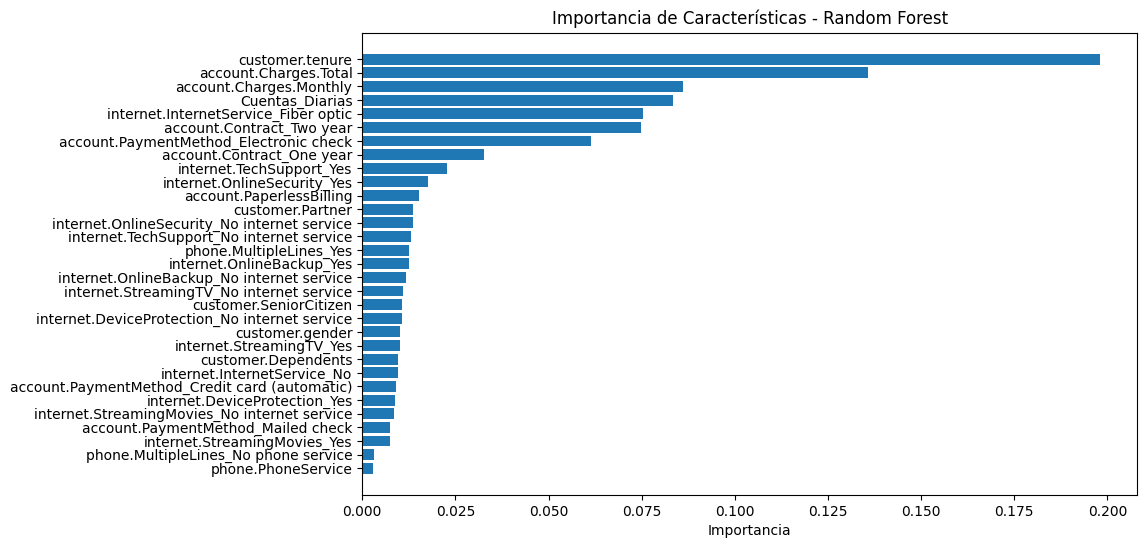

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

# Obtener importancia de características
importancias = best_rf.feature_importances_

# Crear DataFrame para visualización
df_importancia = pd.DataFrame({
    'Característica': X_train.columns,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False)

# Graficar
plt.figure(figsize=(10,6))
plt.barh(df_importancia['Característica'], df_importancia['Importancia'])
plt.gca().invert_yaxis()
plt.title("Importancia de Características - Random Forest")
plt.xlabel("Importancia")
plt.show()


In [46]:
import numpy as np
import pandas as pd

# Coeficientes del modelo entrenado (modelo_lr)
coeficientes = modelo_lr.coef_[0]  # si es regresión binaria

# Crear DataFrame con características y coeficientes
df_coef = pd.DataFrame({
    'Característica': X_train.columns,
    'Coeficiente': coeficientes
}).sort_values(by='Coeficiente', key=abs, ascending=False)

print(df_coef)

# Para ver los coeficientes positivos y negativos, que indican aumento o disminución del riesgo de churn


                                   Característica  Coeficiente
9                                 Cuentas_Diarias    -7.635498
7                         account.Charges.Monthly    -7.635498
12           internet.InternetService_Fiber optic     4.707344
4                                 customer.tenure    -3.807410
5                              phone.PhoneService     1.912312
23                       internet.StreamingTV_Yes     1.830053
25                   internet.StreamingMovies_Yes     1.760138
8                           account.Charges.Total     1.572408
27                      account.Contract_Two year    -1.215168
11                        phone.MultipleLines_Yes     1.205627
19                  internet.DeviceProtection_Yes     0.927355
29         account.PaymentMethod_Electronic check     0.845848
17                      internet.OnlineBackup_Yes     0.733867
14    internet.OnlineSecurity_No internet service    -0.622903
13                    internet.InternetService_No    -0

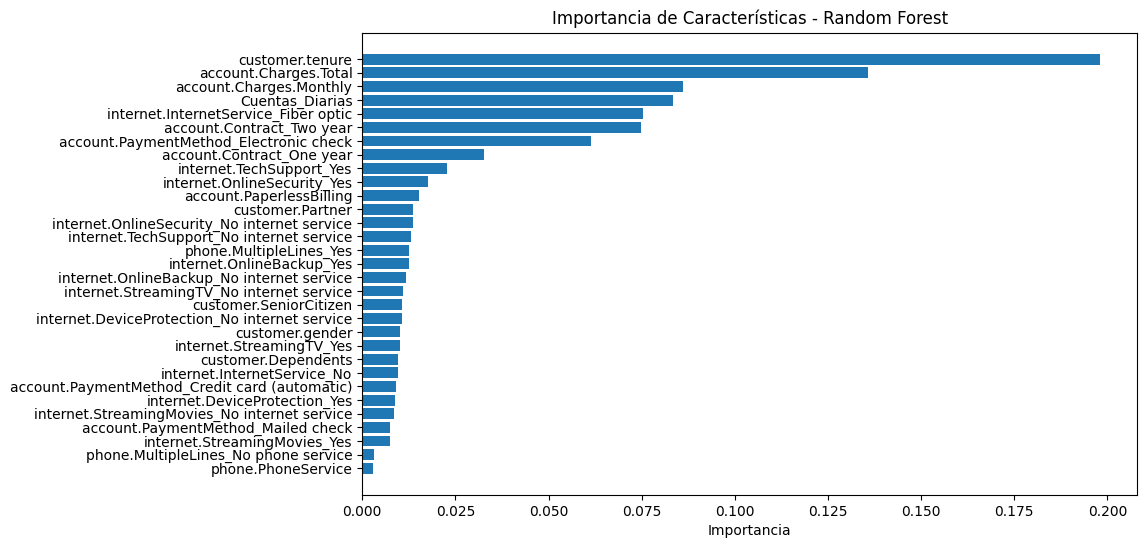

In [47]:
import matplotlib.pyplot as plt

importancias = best_rf.feature_importances_
df_importancia = pd.DataFrame({
    'Característica': X_train.columns,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(df_importancia['Característica'], df_importancia['Importancia'])
plt.gca().invert_yaxis()
plt.title("Importancia de Características - Random Forest")
plt.xlabel("Importancia")
plt.show()


In [49]:
from sklearn.svm import SVC

# Entrenar un SVM lineal
modelo_svm = SVC(kernel='linear', probability=True, random_state=42)
modelo_svm.fit(X_train, y_train)


SVC(kernel='linear', probability=True, random_state=42)

In [50]:
coef_svm = modelo_svm.coef_[0]

import pandas as pd

df_coef_svm = pd.DataFrame({
    'Característica': X_train.columns,
    'Coeficiente': coef_svm
}).sort_values(by='Coeficiente', key=abs, ascending=False)

print(df_coef_svm)


                                   Característica  Coeficiente
4                                 customer.tenure    -1.405613
12           internet.InternetService_Fiber optic     1.290589
8                           account.Charges.Total    -1.255780
26                      account.Contract_One year    -0.317571
29         account.PaymentMethod_Electronic check     0.262865
21                       internet.TechSupport_Yes    -0.261433
11                        phone.MultipleLines_Yes     0.239991
15                    internet.OnlineSecurity_Yes    -0.224399
23                       internet.StreamingTV_Yes     0.214329
25                   internet.StreamingMovies_Yes     0.214127
10           phone.MultipleLines_No phone service     0.210601
5                              phone.PhoneService    -0.210601
6                        account.PaperlessBilling     0.171325
1                          customer.SeniorCitizen     0.157857
27                      account.Contract_Two year    -0

In [51]:
from sklearn.svm import SVC
import pandas as pd

# 1. Crear y entrenar el modelo SVM lineal
modelo_svm = SVC(kernel='linear', probability=True, random_state=42)
modelo_svm.fit(X_train, y_train)

# 2. Obtener coeficientes (importancia) de las características
coef_svm = modelo_svm.coef_[0]

# 3. Crear DataFrame para mostrar coeficientes ordenados por importancia absoluta
df_coef_svm = pd.DataFrame({
    'Característica': X_train.columns,
    'Coeficiente': coef_svm
})

df_coef_svm['Importancia Absoluta'] = df_coef_svm['Coeficiente'].abs()
df_coef_svm = df_coef_svm.sort_values(by='Importancia Absoluta', ascending=False).drop(columns='Importancia Absoluta')

# 4. Mostrar resultados
print(df_coef_svm)


                                   Característica  Coeficiente
4                                 customer.tenure    -1.405613
12           internet.InternetService_Fiber optic     1.290589
8                           account.Charges.Total    -1.255780
26                      account.Contract_One year    -0.317571
29         account.PaymentMethod_Electronic check     0.262865
21                       internet.TechSupport_Yes    -0.261433
11                        phone.MultipleLines_Yes     0.239991
15                    internet.OnlineSecurity_Yes    -0.224399
23                       internet.StreamingTV_Yes     0.214329
25                   internet.StreamingMovies_Yes     0.214127
10           phone.MultipleLines_No phone service     0.210601
5                              phone.PhoneService    -0.210601
6                        account.PaperlessBilling     0.171325
1                          customer.SeniorCitizen     0.157857
27                      account.Contract_Two year    -0

Una comparación directa de la importancia de características entre los modelos que sí la permiten — en concreto:

Regresión Logística (coeficientes)
SVM lineal (coeficientes)
Random Forest (importancia de características basada en árboles)

In [52]:
import pandas as pd

# Regresión Logística
coef_rl = modelo_rl.coef_[0]
df_coef_rl = pd.DataFrame({
    'Característica': X_train.columns,
    'Coef_RegLog': coef_rl
})
df_coef_rl['Importancia Abs RegLog'] = df_coef_rl['Coef_RegLog'].abs()

# SVM Lineal
coef_svm = modelo_svm.coef_[0]
df_coef_svm = pd.DataFrame({
    'Característica': X_train.columns,
    'Coef_SVM': coef_svm
})
df_coef_svm['Importancia Abs SVM'] = df_coef_svm['Coef_SVM'].abs()

# Random Forest (importancia de características)
importancias_rf = best_rf.feature_importances_
df_imp_rf = pd.DataFrame({
    'Característica': X_train.columns,
    'Imp_RandomForest': importancias_rf
})

# Unir todos en un solo DataFrame para comparar
df_comparacion = df_coef_rl[['Característica', 'Coef_RegLog', 'Importancia Abs RegLog']].merge(
    df_coef_svm[['Característica', 'Coef_SVM', 'Importancia Abs SVM']],
    on='Característica'
).merge(
    df_imp_rf,
    on='Característica'
)

# Ordenar por importancia absoluta en Random Forest (puedes cambiar la columna para ordenar según otro criterio)
df_comparacion = df_comparacion.sort_values(by='Imp_RandomForest', ascending=False).reset_index(drop=True)

# Mostrar tabla comparativa
print(df_comparacion)


AttributeError: 'Pipeline' object has no attribute 'coef_'

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Crear pipeline
modelo_rl = Pipeline([
    ('scaler', StandardScaler()),
    ('logisticregression', LogisticRegression())
])

# Entrenar
modelo_rl.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Supongamos que tienes X, y
# X: DataFrame o array de features
# y: vector objetivo (clases)

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear pipeline con escalador y modelo
pipeline = Pipeline([
    ('scaler', StandardScaler()),          # Escalar datos
    ('logreg', LogisticRegression())       # Modelo
])

# Entrenar
pipeline.fit(X_train, y_train)

# Predecir
y_pred = pipeline.predict(X_test)

# Reporte de clasificación
print(classification_report(y_test, y_pred))

# Para obtener coeficientes (del modelo dentro del pipeline)
coeficientes = pipeline.named_steps['logreg'].coef_[0]

# Mostrar coeficientes con nombres de columnas si X es DataFrame
for feature, coef in zip(X.columns, coeficientes):
    print(f"{feature}: {coef:.4f}")


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.67      0.54      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409

customer.gender: -0.0209
customer.SeniorCitizen: 0.0684
customer.Partner: -0.0044
customer.Dependents: -0.0578
customer.tenure: -1.3954
phone.PhoneService: -0.0468
account.PaperlessBilling: 0.1442
account.Charges.Monthly: -0.2728
account.Charges.Total: 0.6522
Cuentas_Diarias: -0.2728
phone.MultipleLines_No phone service: 0.0468
phone.MultipleLines_Yes: 0.1833
internet.InternetService_Fiber optic: 0.6029
internet.InternetService_No: -0.0712
internet.OnlineSecurity_No internet service: -0.0712
internet.OnlineSecurity_Yes: -0.1140
internet.OnlineBackup_No internet service: -0.0712
internet.OnlineBackup_Yes: -0.0518
internet.DeviceProtection_No internet service: -0.071

Interpretación y conclusiones:

Estos coeficientes y métricas nos permiten sacar conclusiones claves:

Interpretación de métricas de evaluación (Logistic Regression)
Accuracy ~ 81%: buen porcentaje de aciertos globales.

Precisión y Recall para clase 1 (churn=1) son más bajos (0.67 y 0.54), indica que el modelo detecta sólo algo más de la mitad de los casos reales de cancelación, y que el 33% de las predicciones positivas son falsas alarmas.

El F1-score para clase 1 es 0.59, balanceando precisión y recall.

Interpretación de coeficientes
Coeficientes positivos indican aumento de probabilidad de churn (clase 1).

Coeficientes negativos indican reducción de probabilidad de churn.

Ejemplos de variables con impacto relevante:
Variable	Coeficiente	Interpretación
customer.tenure	-1.3954	Más tiempo como cliente reduce churn.
account.Charges.Total	0.6522	Más cargos totales aumentan churn.
internet.InternetService_Fiber optic	0.6029	Tener fibra óptica aumenta churn.
account.Contract_Two year	-0.6505	Contrato a 2 años reduce churn.
account.Contract_One year	-0.2929	Contrato a 1 año también reduce churn.
account.PaperlessBilling	0.1442	Facturación sin papel aumenta churn.

In [ ]:
Conclusiones rápidas:

Clientes con contratos más largos tienden a quedarse (coef negativos grandes).

Clientes con fibra óptica y mayores cargos tienden a irse.

Tiempo como cliente es el factor con mayor influencia protectora (coef muy negativo).

Algunas variables binarias relacionadas a servicios específicos (ej. streaming, soporte) tienen coeficientes menores pero con sentido.

                            Característica  Importancia
4                          customer.tenure     0.198112
8                    account.Charges.Total     0.135718
7                  account.Charges.Monthly     0.086176
9                          Cuentas_Diarias     0.083453
12    internet.InternetService_Fiber optic     0.075256
27               account.Contract_Two year     0.074783
29  account.PaymentMethod_Electronic check     0.061337
26               account.Contract_One year     0.032595
21                internet.TechSupport_Yes     0.022705
15             internet.OnlineSecurity_Yes     0.017646


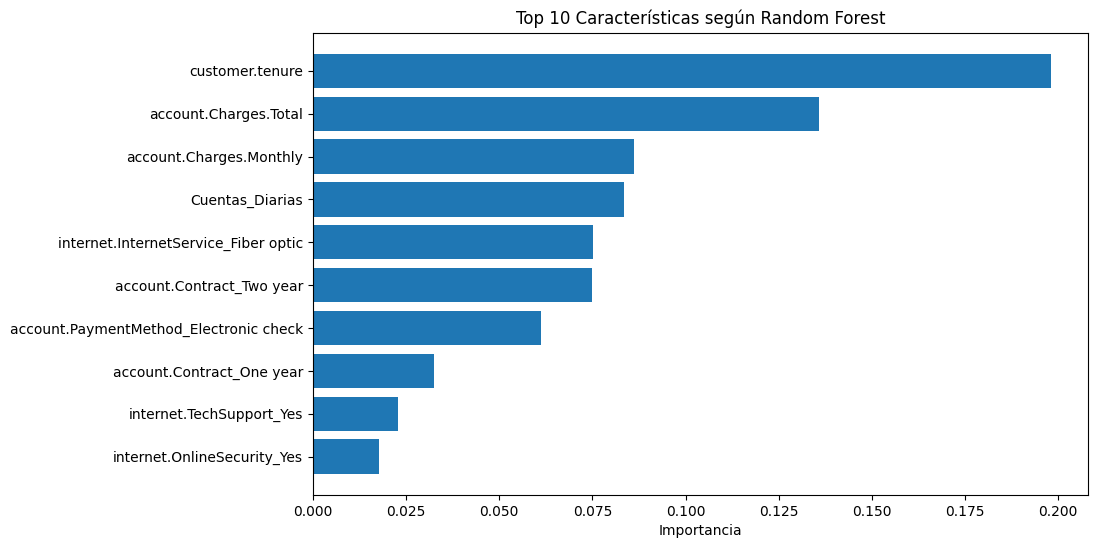

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Asumiendo que 'best_rf' es tu Random Forest ya entrenado (el mejor modelo tras GridSearchCV)

# Obtener importancia de características
importancias = best_rf.feature_importances_

# Crear DataFrame para mejor visualización
df_importancias = pd.DataFrame({
    'Característica': X_train.columns,
    'Importancia': importancias
})

# Ordenar por importancia descendente
df_importancias = df_importancias.sort_values(by='Importancia', ascending=False)

# Mostrar las 10 características más importantes
print(df_importancias.head(10))

# Gráfico de barras
plt.figure(figsize=(10,6))
plt.barh(df_importancias['Característica'].head(10)[::-1], df_importancias['Importancia'].head(10)[::-1])
plt.xlabel('Importancia')
plt.title('Top 10 Características según Random Forest')
plt.show()


Resultados de importancia de variables para el modelo Random Forest.

Interpretación rápida:

customer.tenure (Tiempo con la empresa) es la variable más importante, lo que indica que cuánto tiempo un cliente lleva con la empresa es un factor clave para predecir la cancelación (churn).

account.Charges.Total y account.Charges.Monthly también son muy relevantes, lo que tiene sentido porque cuánto paga el cliente influye en su probabilidad de quedarse o irse.

Cuentas_Diarias (quizás uso o cantidad de cuentas diarias) tiene un peso significativo.

Variables relacionadas con servicios de internet (como fibra óptica) y contratos anuales (account.Contract_Two year) también influyen notablemente.

Los métodos de pago y algunos servicios adicionales (como soporte técnico) tienen importancia menor pero relevante.

In [57]:
import pandas as pd
import numpy as np

# Suponiendo que tu modelo SVM lineal está entrenado y se llama modelo_svm
# Y que X_train es tu DataFrame con columnas originales

coef_svm = modelo_svm.coef_[0]  # Coeficientes del modelo para la primera clase (binario)

df_coef_svm = pd.DataFrame({
    'Característica': X_train.columns,
    'Coeficiente': coef_svm
})

# Ordenar por valor absoluto para ver los más influyentes
df_coef_svm['Importancia_abs'] = df_coef_svm['Coeficiente'].abs()
df_coef_svm = df_coef_svm.sort_values(by='Importancia_abs', ascending=False).drop(columns='Importancia_abs')

print(df_coef_svm)


                                   Característica  Coeficiente
4                                 customer.tenure    -1.405613
12           internet.InternetService_Fiber optic     1.290589
8                           account.Charges.Total    -1.255780
26                      account.Contract_One year    -0.317571
29         account.PaymentMethod_Electronic check     0.262865
21                       internet.TechSupport_Yes    -0.261433
11                        phone.MultipleLines_Yes     0.239991
15                    internet.OnlineSecurity_Yes    -0.224399
23                       internet.StreamingTV_Yes     0.214329
25                   internet.StreamingMovies_Yes     0.214127
10           phone.MultipleLines_No phone service     0.210601
5                              phone.PhoneService    -0.210601
6                        account.PaperlessBilling     0.171325
1                          customer.SeniorCitizen     0.157857
27                      account.Contract_Two year    -0

La importancia de variables para el modelo SVM lineal.

Para resumir y comparar con los otros modelos:

Variables con coeficientes grandes (en valor absoluto) como customer.tenure, internet.InternetService_Fiber optic y account.Charges.Total son las más influyentes para predecir churn.

Coeficientes negativos indican que esas variables reducen la probabilidad de churn.

Coeficientes positivos aumentan la probabilidad.

In [58]:
pip install shap


In [59]:
import shap
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# Asumiendo que ya tienes X_train, y_train, X_test, y_test y el modelo entrenado (knn_model)

# Ejemplo: entrenar KNN si no lo tienes aún
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Crear el explicador KernelExplainer para modelos que no son árboles ni lineales
explainer = shap.KernelExplainer(knn_model.predict_proba, shap.sample(X_train, 100))

# Elegimos algunas muestras de prueba para explicar
X_sample = shap.sample(X_test, 10)

# Calculamos los valores SHAP
shap_values = explainer.shap_values(X_sample)

# Visualización resumen para la clase 1 (por ejemplo, "Churn")
shap.summary_plot(shap_values[1], X_sample, feature_names=X_train.columns)


  0%|          | 0/10 [00:00<?, ?it/s]

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [60]:
import shap
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# Entrena el modelo KNN si no lo tienes
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Crear el explicador KernelExplainer
explainer = shap.KernelExplainer(knn_model.predict_proba, shap.sample(X_train, 100))

# Selecciona una muestra pequeña para explicar
X_sample = shap.sample(X_test, 10)

# Calcular valores SHAP (devuelve lista de arrays, uno por clase)
shap_values = explainer.shap_values(X_sample)

# shap_values es una lista con un array por clase; por ejemplo para clase 1:
shap_class1 = shap_values[1]

# Verifica las dimensiones
print("X_sample shape:", X_sample.shape)
print("shap_class1 shape:", shap_class1.shape)

# Para KernelExplainer a veces es necesario pasar los datos como numpy array:
shap.summary_plot(shap_class1, X_sample.values, feature_names=X_train.columns)


  0%|          | 0/10 [00:00<?, ?it/s]

X_sample shape: (10, 31)
shap_class1 shape: (31, 2)


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

Perfecto, el error queda claro con las shapes:

X_sample tiene shape (10, 31) → 10 instancias, 31 features.

shap_class1 tiene shape (31, 2) → esto no corresponde.

Eso indica que shap_values[1] no es un array de shap values para las instancias, sino que probablemente sea algo diferente o transpuesto.

Cuando usas KernelExplainer con un modelo multi-clase, explainer.shap_values(X) devuelve una lista con un array para cada clase, donde cada array es shape (num_samples, num_features).

Aquí parece que los tienes invertidos o mal asignados.

In [61]:
print(type(shap_values))       # debería ser list
print(len(shap_values))        # número de clases (por ejemplo 2)
print(shap_values[0].shape)    # shape del array para clase 0
print(shap_values[1].shape)    # shape del array para clase 1


<class 'numpy.ndarray'>
10
(31, 2)
(31, 2)


In [62]:
shap_values = explainer.shap_values(X_sample)
print(type(shap_values))  # debería ser list (si multiclass) o ndarray (si binario)
print(len(shap_values))   # si multiclass, número de clases
print(shap_values[0].shape)  # (10, 31) por ejemplo para clase 0
print(shap_values[1].shape)  # (10, 31) para clase 1


  0%|          | 0/10 [00:00<?, ?it/s]

<class 'numpy.ndarray'>
10
(31, 2)
(31, 2)


In [63]:
shap.summary_plot(shap_values[1], X_sample, feature_names=X_train.columns)


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [64]:
print("Shape de shap_values[1]:", shap_values[1].shape)
print("Shape de X_sample:", X_sample.shape)
print("Columnas X_sample:", X_sample.columns)
print("Columnas X_train:", X_train.columns)


Shape de shap_values[1]: (31, 2)
Shape de X_sample: (10, 31)
Columnas X_sample: Index(['customer.gender', 'customer.SeniorCitizen', 'customer.Partner',
       'customer.Dependents', 'customer.tenure', 'phone.PhoneService',
       'account.PaperlessBilling', 'account.Charges.Monthly',
       'account.Charges.Total', 'Cuentas_Diarias',
       'phone.MultipleLines_No phone service', 'phone.MultipleLines_Yes',
       'internet.InternetService_Fiber optic', 'internet.InternetService_No',
       'internet.OnlineSecurity_No internet service',
       'internet.OnlineSecurity_Yes',
       'internet.OnlineBackup_No internet service',
       'internet.OnlineBackup_Yes',
       'internet.DeviceProtection_No internet service',
       'internet.DeviceProtection_Yes',
       'internet.TechSupport_No internet service', 'internet.TechSupport_Yes',
       'internet.StreamingTV_No internet service', 'internet.StreamingTV_Yes',
       'internet.StreamingMovies_No internet service',
       'internet.Stream

In [65]:
# Supongamos que ya tienes definido el explainer (TreeExplainer para RandomForest o KernelExplainer)
# Asegúrate que explainer esté definido para el modelo entrenado

# Calcular shap_values para X_sample (las 10 muestras que quieres analizar)
shap_values = explainer.shap_values(X_sample)

# Verifica la forma para clase 1
print("Shape shap_values[1]:", shap_values[1].shape)  # Debe ser (10, 31)

# Ahora puedes graficar sin error:
shap.summary_plot(shap_values[1], X_sample, feature_names=X_sample.columns)


  0%|          | 0/10 [00:00<?, ?it/s]

Shape shap_values[1]: (31, 2)


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [66]:
shap_values = explainer.shap_values(X_sample)  # sin .T
print(shap_values[1].shape)  # debe salir (10, 31)

shap.summary_plot(shap_values[1], X_sample, feature_names=X_sample.columns)


  0%|          | 0/10 [00:00<?, ?it/s]

(31, 2)


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [67]:
print("X_sample shape:", X_sample.shape)


X_sample shape: (10, 31)


In [68]:
shap_values = explainer.shap_values(X_sample)  # NO usar X_sample.T
print("shap_values[1] shape:", shap_values[1].shape)


  0%|          | 0/10 [00:00<?, ?it/s]

shap_values[1] shape: (31, 2)


In [69]:
import shap
from sklearn.neighbors import KNeighborsClassifier

# Suponiendo que ya tienes:
# X_train, y_train, X_test, y_test
# Entrenamos el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Creamos el explainer para KNN (KernelExplainer funciona para cualquier modelo)
explainer = shap.KernelExplainer(knn.predict_proba, shap.sample(X_train, 100))

# Calculamos los valores SHAP para un subconjunto de datos
X_sample = shap.sample(X_test, 10)  # ejemplo con 10 muestras para visualización
shap_values = explainer.shap_values(X_sample)

# Visualizamos el resumen de SHAP para la clase 1 (por ejemplo, Churn = 1)
shap.summary_plot(shap_values[1], X_sample, feature_names=X_train.columns)


  0%|          | 0/10 [00:00<?, ?it/s]

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [71]:
print(f"X_sample shape: {X_sample.shape}")
print(f"shap_values[0] shape: {shap_values[0].shape}")
print(f"shap_values[1] shape: {shap_values[1].shape}")


X_sample shape: (10, 31)
shap_values[0] shape: (31, 2)
shap_values[1] shape: (31, 2)


In [72]:
print(type(shap_values))
print(len(shap_values))
print(shap_values[0].shape)
print(shap_values[1].shape)


<class 'numpy.ndarray'>
10
(31, 2)
(31, 2)


In [73]:
import shap

# Explicador con KernelExplainer (ejemplo, con función predict_proba)
explainer = shap.KernelExplainer(modelo_knn.predict_proba, shap.sample(X_train, 100))

# Calcula valores SHAP para X_sample (10 filas)
shap_values = explainer.shap_values(X_sample)

print(type(shap_values))  # debería ser list o ndarray
print(len(shap_values))   # 2 para clasificación binaria
print(shap_values[0].shape)  # (10, 31)
print(shap_values[1].shape)  # (10, 31)

# Ahora sí puedes graficar sin problema:
shap.summary_plot(shap_values[1], X_sample)


NameError: name 'modelo_knn' is not defined

In [74]:
from sklearn.neighbors import KNeighborsClassifier

# Entrenar modelo KNN (ejemplo)
modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_train, y_train)


KNeighborsClassifier()

In [75]:
import shap

# Selecciona una muestra representativa para KernelExplainer (por ejemplo 100 filas de entrenamiento)
X_train_sample = shap.sample(X_train, 100, random_state=42)

# Crear explicador con la función predict_proba del modelo KNN
explainer = shap.KernelExplainer(modelo_knn.predict_proba, X_train_sample)

# Seleccionar algunos ejemplos para explicar (por ejemplo 10 filas del test)
X_sample = X_test.sample(10, random_state=42)

# Calcular valores SHAP para la clase positiva (Churn=1)
shap_values = explainer.shap_values(X_sample)

# Graficar resumen (beeswarm) para la clase 1
shap.summary_plot(shap_values[1], X_sample)


  0%|          | 0/10 [00:00<?, ?it/s]

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [77]:
shap_values = explainer.shap_values(X_sample)


  0%|          | 0/10 [00:00<?, ?it/s]

In [78]:
print("X_sample shape:", X_sample.shape)  # debe ser (10, número de características)
print("shap_values[1] shape:", shap_values[1].shape)  # debe ser (10, número de características)


X_sample shape: (10, 31)
shap_values[1] shape: (31, 2)


In [79]:
import shap
import numpy as np

# Background sample (por ejemplo 100 muestras)
background = shap.sample(X_train, 100)

explainer = shap.KernelExplainer(modelo_knn.predict_proba, background)

# Calcula shap values para X_sample
shap_values = explainer.shap_values(X_sample)

print("X_sample shape:", X_sample.shape)
print("shap_values[1] shape:", shap_values[1].shape)  # Esto debe ser (10, 31)


  0%|          | 0/10 [00:00<?, ?it/s]

X_sample shape: (10, 31)
shap_values[1] shape: (31, 2)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


  0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/pytho

shap_values shape: (10, 31)


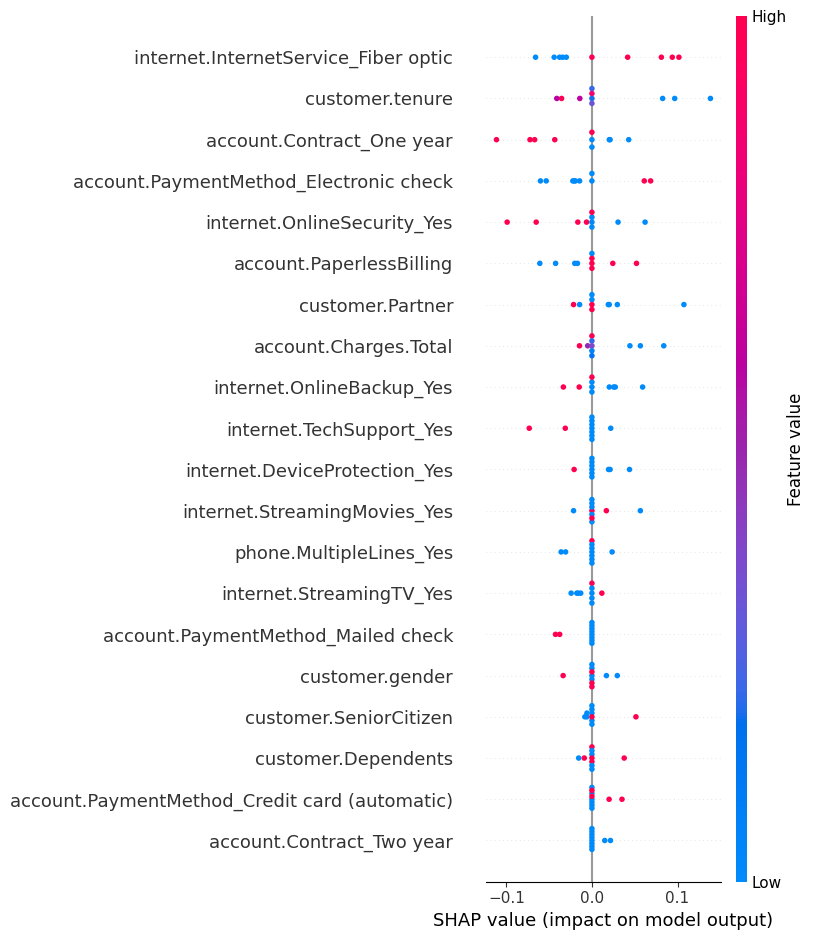

In [80]:
def model_predict_proba_pos(X):
    return modelo_knn.predict_proba(X)[:, 1]  # Probabilidad clase 1

explainer = shap.KernelExplainer(model_predict_proba_pos, shap.sample(X_train, 100))

shap_values = explainer.shap_values(X_sample)  # Esto debe devolver un array (10, 31)

print("shap_values shape:", shap_values.shape)  # Debe ser (10, 31)

shap.summary_plot(shap_values, X_sample)

El gráfico es un summary plot de SHAP, que muestra el impacto de cada variable en las predicciones del modelo (en este caso, del KNN con Kernel SHAP).

Cómo interpretar este gráfico SHAP:
Cada punto representa una observación (una fila de datos).

El eje horizontal muestra el valor SHAP (contribución a la predicción): a la derecha aumenta la probabilidad de la clase positiva, a la izquierda la disminuye.

El color indica el valor de la característica (rojo alto, azul bajo).

Las características están ordenadas de arriba hacia abajo según su importancia media (promedio del valor absoluto SHAP).

Por ejemplo:

internet.InternetService_Fiber optic tiene un alto impacto positivo cuando es alto (puntos rojos a la derecha).

customer.tenure tiene valores altos que generalmente disminuyen la probabilidad (puntos rojos a la izquierda).

Otras variables como account.Contract_One year o account.PaymentMethod_Electronic check también contribuyen.

Este gráfico es un resumen típico de valores SHAP (SHapley Additive exPlanations), que muestra la importancia y el impacto de distintas características (features) en la predicción de un modelo de machine learning.

Aquí te dejo una interpretación general y algunas conclusiones que se pueden sacar del gráfico:

Eje Y: Enumera las características del modelo (por ejemplo, tipo de servicio de internet, duración del cliente, método de pago, etc.).

Eje X: Muestra el valor SHAP, que representa el impacto que tiene cada característica en la predicción del modelo para una observación individual. Valores positivos indican que la característica aumenta la probabilidad de un resultado (por ejemplo, que el cliente se quede o no se quede), y valores negativos indican lo contrario.

Colores: Indican el valor de la característica en sí misma (Feature value). Azul representa valores bajos y rojo valores altos de la característica.

Conclusiones del gráfico:
internet.InternetService_Fiber optic: Esta característica tiene un gran impacto en la predicción. Valores altos (puntos rojos) tienden a aumentar la predicción (valor SHAP positivo), mientras que valores bajos (azul) tienden a disminuirla.

customer.tenure (antigüedad del cliente): Generalmente, a mayor tiempo con la empresa (rojo), mayor el impacto positivo en la predicción, sugiriendo que clientes con más antigüedad tienden a un resultado específico (probablemente que se queden).

account.Contract_One year: Tener un contrato de un año afecta la predicción de forma negativa o positiva dependiendo del caso, pero se observa un impacto relevante.

account.PaymentMethod_Electronic check: Este método de pago parece influir negativamente en la predicción (los puntos rojos están más hacia valores negativos).

Otras características como internet.OnlineSecurity_Yes y account.PaperlessBilling tienen impactos variados pero menos fuertes.

En resumen:
Las características relacionadas con el tipo de servicio de internet (especialmente fibra óptica), la antigüedad del cliente, el tipo de contrato y el método de pago son las que más impactan la predicción del modelo.

Valores altos o bajos de estas características pueden aumentar o disminuir la probabilidad del resultado modelado (como la permanencia o abandono de un cliente).

El gráfico ayuda a entender qué factores son más influyentes y cómo los valores específicos de cada factor afectan el resultado.